# <center>Kiss Dániel Márk</center>
## <center>WP871Q</center>

# Library import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import accuracy_score

# Data import

In [2]:
df_verseny_public_train = pd.read_csv('data/verseny_public_train.csv', sep=',', low_memory=False)

# Data familirsation

In [3]:
df_verseny_public_train

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
0,100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,8,57,0,0,15,43,0,...,0,0,0,0,0,0,0,0,0,0
2,100002,0,0,0,0,8,50,8,50,0,...,0,0,0,0,0,0,0,0,0,0
3,100003,15,15,8,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100004,0,0,8,15,0,0,15,15,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,0,0,0,0,127,1,8,1,22,...,0,0,0,0,0,0,0,0,0,0
99996,199996,50,8,0,0,57,1,50,8,50,...,0,0,0,0,0,0,0,0,0,0
99997,199997,15,127,0,0,22,1,71,120,8,...,0,0,0,0,0,0,0,0,0,0
99998,199998,8,8,0,0,43,1,8,64,8,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_verseny_public_train.describe()

,cookie_id,Topic1_ic,Topic1_ec,Topic2_ic,Topic2_ec,Topic3_ic,Topic3_ec,Topic4_ic,Topic4_ec,Topic5_ic,...,Topic177_ec,Topic178_ic,Topic178_ec,Topic179_ic,Topic179_ec,Topic180_ic,Topic180_ec,Topic181_ic,Topic181_ec,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.000000
mean,149999.500000,8.798000,16.085980,1.066320,7.923940,19.105870,8.563590,15.600520,23.712400,4.927330,...,0.002190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015000
std,28867.657797,23.308133,48.515646,5.824816,50.279646,42.710725,40.371399,31.981042,54.356458,17.719046,...,0.501804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121553
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,124999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,149999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,174999.250000,8.000000,8.000000,0.000000,0.000000,22.000000,1.000000,15.000000,22.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,199999.000000,477.000000,1548.000000,610.000000,1576.000000,631.000000,1506.000000,603.000000,1632.000000,512.000000,...,134.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [5]:
df_verseny_public_train.columns

Index(['cookie_id', 'Topic1_ic', 'Topic1_ec', 'Topic2_ic', 'Topic2_ec',
       'Topic3_ic', 'Topic3_ec', 'Topic4_ic', 'Topic4_ec', 'Topic5_ic',
       ...
       'Topic177_ec', 'Topic178_ic', 'Topic178_ec', 'Topic179_ic',
       'Topic179_ec', 'Topic180_ic', 'Topic180_ec', 'Topic181_ic',
       'Topic181_ec', 'target'],
      dtype='object', length=258)

# Feature importance

## Decision Tree

Feature ranking:
1. Feature 59 (0.038812) Topic42_ec
2. Feature 7 (0.032781) Topic4_ec
3. Feature 68 (0.030643) Topic55_ic
4. Feature 17 (0.027343) Topic12_ec
5. Feature 83 (0.022079) Topic63_ec
6. Feature 82 (0.021848) Topic63_ic
7. Feature 16 (0.021231) Topic12_ic
8. Feature 66 (0.020870) Topic54_ic
9. Feature 61 (0.020017) Topic51_ec
10. Feature 70 (0.018948) Topic56_ic
11. Feature 6 (0.018443) Topic4_ic
12. Feature 71 (0.018080) Topic56_ec
13. Feature 63 (0.017798) Topic52_ec
14. Feature 21 (0.017617) Topic14_ec
15. Feature 19 (0.016118) Topic13_ec
16. Feature 29 (0.016079) Topic19_ec
17. Feature 18 (0.015944) Topic13_ic
18. Feature 14 (0.014295) Topic10_ic
19. Feature 69 (0.013955) Topic55_ec
20. Feature 15 (0.013572) Topic10_ec
21. Feature 135 (0.013216) Topic99_ec
22. Feature 20 (0.012907) Topic14_ic
23. Feature 28 (0.012900) Topic19_ic
24. Feature 131 (0.012641) Topic97_ec
25. Feature 105 (0.011964) Topic74_ec
26. Feature 12 (0.011478) Topic9_ic
27. Feature 4 (0.011469) Topic3_

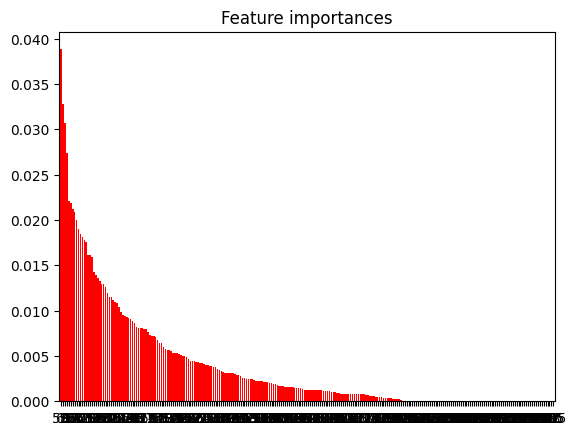

In [6]:
X = df_verseny_public_train.drop(['target', 'cookie_id'], axis=1)
y = df_verseny_public_train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Random forest

Feature ranking:
1. Feature 7 (0.024880) Topic4_ec
2. Feature 17 (0.023349) Topic12_ec
3. Feature 68 (0.023297) Topic55_ic
4. Feature 83 (0.022263) Topic63_ec
5. Feature 16 (0.021904) Topic12_ic
6. Feature 19 (0.021877) Topic13_ec
7. Feature 6 (0.021728) Topic4_ic
8. Feature 21 (0.021466) Topic14_ec
9. Feature 82 (0.020424) Topic63_ic
10. Feature 18 (0.020288) Topic13_ic
11. Feature 70 (0.019938) Topic56_ic
12. Feature 71 (0.019662) Topic56_ec
13. Feature 20 (0.019584) Topic14_ic
14. Feature 59 (0.019439) Topic42_ec
15. Feature 66 (0.017038) Topic54_ic
16. Feature 4 (0.016673) Topic3_ic
17. Feature 61 (0.016659) Topic51_ec
18. Feature 69 (0.016160) Topic55_ec
19. Feature 67 (0.015129) Topic54_ec
20. Feature 29 (0.014428) Topic19_ec
21. Feature 28 (0.013917) Topic19_ic
22. Feature 1 (0.011981) Topic1_ec
23. Feature 12 (0.011823) Topic9_ic
24. Feature 35 (0.011574) Topic24_ec
25. Feature 87 (0.011287) Topic65_ec
26. Feature 22 (0.011079) Topic15_ic
27. Feature 105 (0.010986) Topic74_ec
2

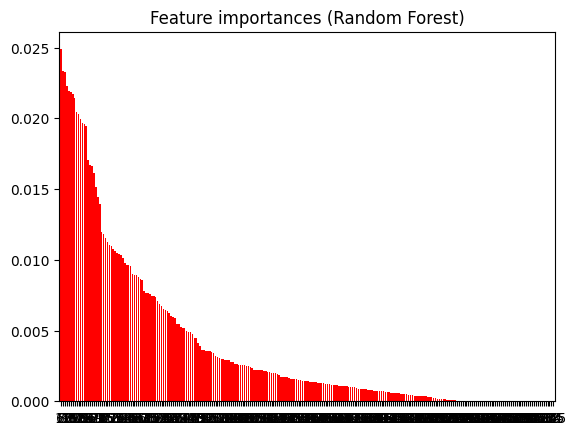

In [7]:
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train)


importances_rf = clf_rf.feature_importances_


indices_rf = np.argsort(importances_rf)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature %d (%f) %s" % (f + 1, indices_rf[f], importances_rf[indices_rf[f]], X.columns[indices_rf[f]]))

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.bar(range(X.shape[1]), importances_rf[indices_rf],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices_rf)
plt.xlim([-1, X.shape[1]])
plt.show()

In [8]:
# Create DataFrames for feature importances
dt_feature_importances = pd.DataFrame({'Feature': indices, 'Importance_DT': importances[indices]})
rf_feature_importances = pd.DataFrame({'Feature': indices_rf, 'Importance_RF': importances_rf[indices_rf]})

# Merge DataFrames on the 'Feature' column
merged_feature_importances = pd.merge(dt_feature_importances, rf_feature_importances, on='Feature')

print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
     Feature  Importance_DT  Importance_RF
0         59       0.038812       0.019439
1          7       0.032781       0.024880
2         68       0.030643       0.023297
3         17       0.027343       0.023349
4         83       0.022079       0.022263
..       ...            ...            ...
251      209       0.000000       0.000011
252      208       0.000000       0.000015
253      206       0.000000       0.000123
254      205       0.000000       0.000134
255      255       0.000000       0.000000

[256 rows x 3 columns]


In [9]:
percentile_threshold = 0.75

importance_threshold_dt = merged_feature_importances['Importance_DT'].quantile(percentile_threshold)
importance_threshold_rf = merged_feature_importances['Importance_RF'].quantile(percentile_threshold)

print("Threshold value based on the top", int(percentile_threshold * 100), "percentileDT:", importance_threshold_dt, "percentileRF:", importance_threshold_rf)


Threshold value based on the top 75 percentileDT: 0.004967638907296916 percentileRF: 0.005186436430866423


In [10]:
merged_feature_importances = merged_feature_importances[(merged_feature_importances['Importance_DT'] > importance_threshold_dt) & (merged_feature_importances['Importance_RF'] > importance_threshold_rf)]
print("Merged Feature Importances:")
print(merged_feature_importances)

Merged Feature Importances:
    Feature  Importance_DT  Importance_RF
0        59       0.038812       0.019439
1         7       0.032781       0.024880
2        68       0.030643       0.023297
3        17       0.027343       0.023349
4        83       0.022079       0.022263
5        82       0.021848       0.020424
6        16       0.021231       0.021904
7        66       0.020870       0.017038
8        61       0.020017       0.016659
9        70       0.018948       0.019938
10        6       0.018443       0.021728
11       71       0.018080       0.019662
12       63       0.017798       0.009651
13       21       0.017617       0.021466
14       19       0.016118       0.021877
15       29       0.016079       0.014428
16       18       0.015944       0.020288
17       14       0.014295       0.010495
18       69       0.013955       0.016160
19       15       0.013572       0.008893
20      135       0.013216       0.007661
21       20       0.012907       0.019584
22    

In [11]:
X = X.drop(X.columns.difference(X.columns[merged_feature_importances['Feature']]), axis=1)


In [12]:
len(X.columns)

57

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell building - Random forest and AdaBoost with Voting

In [14]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

# Define base classifiers
base_rf = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=5, random_state=42, criterion='entropy')
base_ada = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create the VotingClassifier with majority voting
voting_clf = VotingClassifier(estimators=[('rf', base_rf), ('ada', base_ada)], voting='soft')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Predict on the test data
y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Accuracy (Voting Classifier):", accuracy_voting)


/Users/kissdanielmark/Documents/01.Iskola/MSc/3/Customer Analytics/Competition/CustomerAnalytics_Competition/.venv/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy (Voting Classifier): 0.98525


# Test set

In [15]:
df_verseny_public_test = pd.read_csv('data/verseny_public_test.csv', sep=',', low_memory=False)

# Random forest

In [16]:
X_test_test = df_verseny_public_test.drop(['cookie_id'], axis=1)

X_test_test = X_test_test.drop(X_test_test.columns.difference(X.columns), axis=1)

y_pred_rf = voting_clf.predict_proba(X_test_test)[:, 1]

df_verseny_public_test['target'] = y_pred_rf

df_verseny_public_test = df_verseny_public_test[['cookie_id', 'target']]

df_verseny_public_test.to_csv('data/prediction_random_forest_w_adaboost_voting_75.csv', index=False)